## Reinforcement Learning for Operational Research

#### Environments
See [or-gym repo](https://github.com/hubbs5/or-gym) implementation reference
* [Newsvendor-v0](https://arxiv.org/pdf/2008.06319.pdf)
* [NetworkManagement-v0](https://mdpi-res.com/d_attachment/processes/processes-09-00102/article_deploy/processes-09-00102.pdf)

Also of interest: 
* InvManagement-v0
* VehicleRouting-v0
* TSP-v1

#### Extensions
* Options for delivery: truck, train, boat, plane
    * Each has different time delay & costs
* single agent vs multi-agent (competing)

2nd MDP for international import vs exports
* objective 1: optimize import / exports for a given country
* objective 2: optimize globally
* baseline: six sigma (SOTA in human organization)


In [1]:
import or_gym
from or_gym.utils import create_env
import ray
import ray.rllib.agents.ppo as ppo
from ray import tune
from ppo import *

def register_env(env_name, env_config={}):
    env = create_env(env_name)
    tune.register_env(env_name, 
        lambda env_name: env(env_name,
            env_config=env_config))


In [2]:
# env_name = 'NewsVendorDiscrete-v0'
env_name = 'Newsvendor-v0'
env = or_gym.make(env_name)
print(env.action_space)
print(env.observation_space)

Box([0], [2000], (1,), int32)
Box([0 0 0 0 0 0 0 0 0 0], [ 100  100    5   10  200 4000 2000 2000 2000 2000], (10,), int32)


In [3]:

# Environment and RL Configuration Settings
env_config = {        
    'lead_time': 10,
    'max_inventory': 2000,
    'max_order_quantity': 200,
    'step_limit': 100,
    'p_max': 100,    # Max sale price,
    'h_max': 5 ,     # Max holding cost,
    'k_max': 100 ,    # Max lost sales penalty,
    'mu_max': 100  , # Max mean of the demand distribution,
}

# Register environment
register_env(env_name, env_config)

rl_config['env'] = env_name
rl_config['env_config'] = env_config
 

In [5]:
agent = ppo.PPOTrainer(env=env_name,
    config=rl_config)
 
results = []
for i in range(200):
    res = agent.train()
    results.append(res)
    # if (i+1) % 10 == 0:
    print('\nIter: {}\tReward: {:.2f}'.format(
            i+1, res['episode_reward_mean']), end='')
ray.shutdown()

2022-04-13 00:05:39,147	WARNING ppo.py:223 -- `train_batch_size` (32000) cannot be achieved with your other settings (num_workers=11 num_envs_per_worker=1 rollout_fragment_length=200)! Auto-adjusting `rollout_fragment_length` to 2909.
(RolloutWorker pid=31422) 2022-04-13 00:05:48,129	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=31421) 2022-04-13 00:05:48,130	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
2022-04-13 00:05:48,277	INFO worker_set.py:118 -- Inferred observation/action spaces from remote worker (local worker has no env): {'default_policy': (Box([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], [ 100  100    5  100  100 2000  200  200  200  200  200  200  200  200
  200], (15,), int32), Box([0], [200], (1,), int32)), '__env__': (Box([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], [ 100  100    5  100  100 2000  200  200  200  200  200  200  200  200
  200], (15,), int32), Box([0], [200], (1,), int32))}
2022-04-13 00:05:48,288	


Iter: 1	Reward: -300668.94

(RolloutWorker pid=31415) 2022-04-13 00:05:58,770	WARNING deprecation.py:45 -- DeprecationWarning: `clear_buffer` has been deprecated. Use `Filter.reset_buffer()` instead. This will raise an error in the future!



Iter: 2	Reward: -323923.44
Iter: 3	Reward: -325560.80
Iter: 4	Reward: -350496.23
Iter: 5	Reward: -342337.33
Iter: 6	Reward: -298297.55
Iter: 7	Reward: -292316.71
Iter: 8	Reward: -291213.17
Iter: 9	Reward: -339258.46
Iter: 10	Reward: -301834.14
Iter: 11	Reward: -329404.51
Iter: 12	Reward: -315253.72
Iter: 13	Reward: -283706.87
Iter: 14	Reward: -317866.70
Iter: 15	Reward: -285521.04
Iter: 16	Reward: -304437.57
Iter: 17	Reward: -264316.47
Iter: 18	Reward: -296050.50
Iter: 19	Reward: -278972.47
Iter: 20	Reward: -289384.31
Iter: 21	Reward: -236957.84
Iter: 22	Reward: -301974.03
Iter: 23	Reward: -271641.97
Iter: 24	Reward: -251193.06
Iter: 25	Reward: -250378.10
Iter: 26	Reward: -268057.68
Iter: 27	Reward: -218241.75
Iter: 28	Reward: -284926.14
Iter: 29	Reward: -254057.98
Iter: 30	Reward: -247050.62
Iter: 31	Reward: -264415.66
Iter: 32	Reward: -216422.81
Iter: 33	Reward: -251701.12
Iter: 34	Reward: -226590.41
Iter: 35	Reward: -256674.05
Iter: 36	Reward: -250706.50
Iter: 37	Reward: -210863.47

KeyboardInterrupt: 

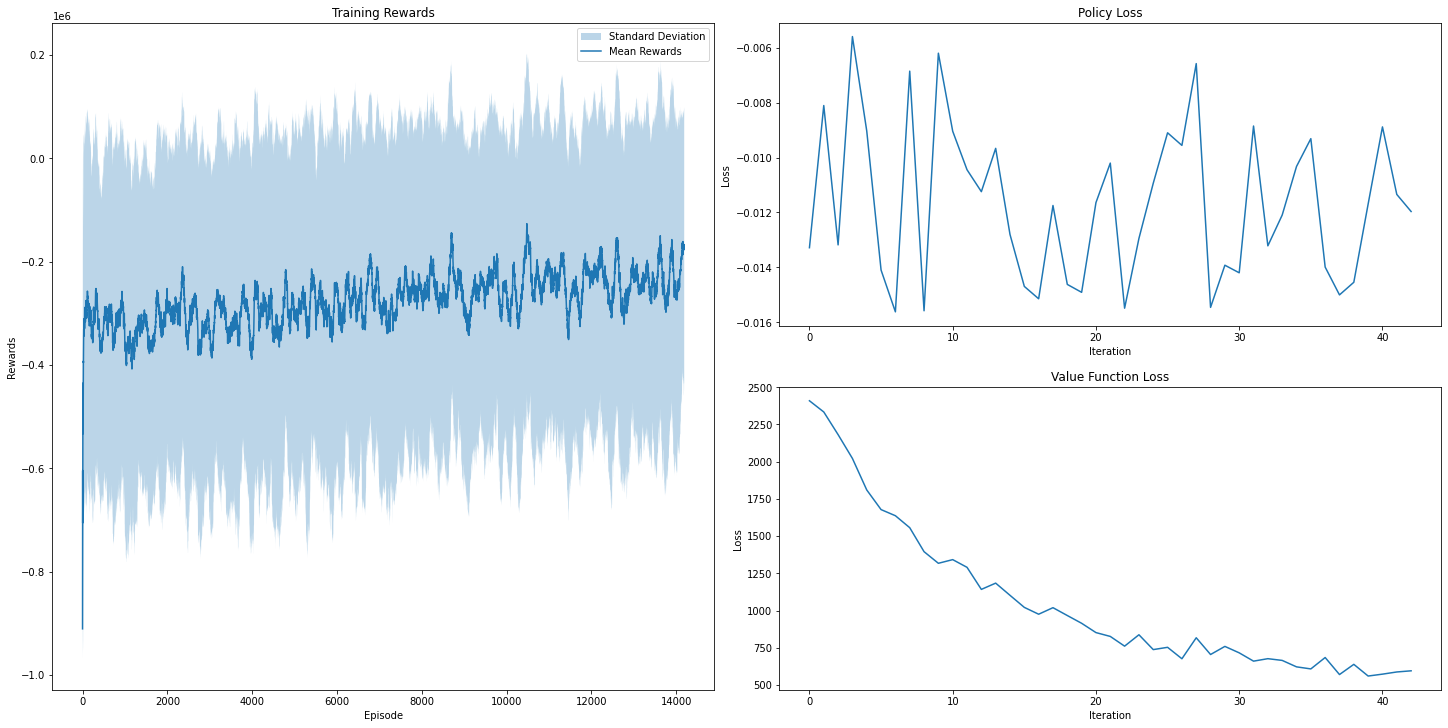

In [6]:
plot_results(results)